# Практическое задание 2
# Классификация заемщиков линейными моделями

## Студент: Timur Taziev

## Формулировка задания
Данное задание направлено на ознакомление с линейными моделями.

От вас требуется:
1. Загрузить данные
2. Провести первичный анализ данных, изучить имеющиеся признаки
3. Провести обработку данных и обучить простую линейную модель
4. С помощью кросс-валидации + GridSearch подобрать основные параметры для линейной модели. Провести простой отбор признаков
5. Посмотреть как изменение остальных параметров влияет на метрики
6. Оценить качество полученной модели

## 1. Загрузка данных (5 баллов)

Эксперименты будем проводить на [датасете](https://www.kaggle.com/competitions/home-credit-default-risk/overview) по классификации заемщиков на плохих (target = 1: клиент с "payment difficulties") и хороших (target = 0: все остальные). Для экспериментов будем использовать лишь основной файл `application_train.csv`, а также перекодируем таргет в метки -1, 1.

Описание колонок находится в файле `description.csv`.

Для начала мы за вас считаем данные и поделим на обучение, валидацию и тест случайным образом.

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

description = pd.read_csv('HomeCredit_columns_description.csv',encoding='ISO-8859-1',usecols=['Row', 'Description'])
description.head()

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,Target variable (1 - client with payment diffi...
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car


In [2]:
data = pd.read_csv('application_train.csv')
data.columns = ['_'.join([word.lower() for word in col_name.split(' ') if word != '-']) for col_name in data.columns]

data.target = data.target.map({0: -1, 1: 1})

from IPython.display import display

print('\ntarget value_counts:')
display(data['target'].value_counts(dropna=False))

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

data.head(3)


target value_counts:


target
-1    282686
 1     24825
Name: count, dtype: int64

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,...,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,-1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,-1,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



## 2. Первичный анализ данных, изучение признаков (5 баллов)

Изучите признаки, которые имеются в датасете.  
Какие из них относятся к каким типам?
Как они коррелируют с целевой переменной?

In [ ]:
# TODO
# Проведите первичное изучение признаков

In [3]:
# имеем относительно большой обьем данных весом 290МБ что скажется на:
# времени обучении модели и выявление лучших параметров в GridSearch.
# так же имеем 122 признака. все ли они так полезны?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, sk_id_curr to amt_req_credit_bureau_year
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
# количество уникальных значений категориальных переменных
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
data[categorical_columns].nunique().sort_values()

name_contract_type             2
flag_own_car                   2
flag_own_realty                2
emergencystate_mode            2
code_gender                    3
housetype_mode                 3
fondkapremont_mode             4
name_education_type            5
name_family_status             6
name_housing_type              6
name_type_suite                7
weekday_appr_process_start     7
wallsmaterial_mode             7
name_income_type               8
occupation_type               18
organization_type             58
dtype: int64

In [5]:
# пол имеет 3 уникальных значения
data['code_gender'].value_counts()

code_gender
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [6]:
# убираем аномалии
data = data[data['code_gender'] != 'XNA']

In [7]:
# видим что organization_type имеет 58 уникальный значений, это усложнит нам задачу при кодировки признаков
# удалим его
data = data.drop('organization_type', axis= 1)

In [8]:
# тип дохода
data['name_income_type'].value_counts()

name_income_type
Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [9]:
# слишком мало данных для прогноза у редких значений. удалим их
outlier_values = ["Businessman", "Maternity leave", "Student", "Unemployed"]
data = data[~data['name_income_type'].isin(outlier_values)]

In [10]:
data['name_family_status'].value_counts()

name_family_status
Married                 196398
Single / not married     45433
Civil marriage           29766
Separated                19768
Widow                    16085
Unknown                      2
Name: count, dtype: int64

In [11]:
data = data[data['name_family_status'] != 'Unknown']

In [12]:
# удалим дни недели
data = data.drop('weekday_appr_process_start',axis=1)

In [13]:
# видим что нету сильной корреляции числовых признаков с целевой
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
top_corr_var = data.drop(categorical_columns,axis=1).corr()['target'].abs().sort_values().nlargest(20)
top_corr_var

target                         1.000000
ext_source_3                   0.178933
ext_source_2                   0.160389
ext_source_1                   0.155287
days_birth                     0.078285
region_rating_client_w_city    0.060886
region_rating_client           0.058898
days_last_phone_change         0.055224
days_id_publish                0.051446
reg_city_not_work_city         0.051023
flag_emp_phone                 0.046162
days_employed                  0.045113
flag_document_3                0.044486
reg_city_not_live_city         0.044444
floorsmax_avg                  0.043983
floorsmax_medi                 0.043748
floorsmax_mode                 0.043211
days_registration              0.041987
amt_goods_price                0.039681
own_car_age                    0.037672
Name: target, dtype: float64

In [14]:
# посмотрим на топ 4. пустые значения, это плохо
data[top_corr_var[:5].index].isnull().sum()

target               0
ext_source_3     60932
ext_source_2       660
ext_source_1    173344
days_birth           0
dtype: int64

In [15]:
# топ 50 минимальной корреляции с целевой. максимальное значение которое не превышает 2%
min_corr_var = data.drop(categorical_columns,axis=1).corr()['target'].abs().sort_values().nsmallest(50)
min_corr_var

flag_document_20                0.000217
flag_document_5                 0.000300
flag_cont_mobile                0.000346
flag_mobil                      0.000534
flag_document_12                0.000756
amt_req_credit_bureau_week      0.000782
amt_req_credit_bureau_hour      0.000928
flag_document_7                 0.001285
flag_document_19                0.001356
flag_document_10                0.001414
nonlivingapartments_mode        0.001566
flag_email                      0.001767
amt_req_credit_bureau_qrt       0.002030
sk_id_curr                      0.002128
flag_document_4                 0.002672
amt_req_credit_bureau_day       0.002702
nonlivingapartments_medi        0.002766
live_region_not_work_region     0.002847
nonlivingapartments_avg         0.003185
flag_document_17                0.003377
flag_document_21                0.003710
amt_income_total                0.003918
flag_document_11                0.004226
flag_document_9                 0.004349
flag_document_2 

In [16]:
# уберем низко коррелируемые признаки
data = data.drop(min_corr_var.index,axis = 1)

In [17]:
def percent_missing(data):
    percent_nan = 100* data.isnull().sum() / len(data)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

nan_values = percent_missing(data).sort_values(ascending=False).nlargest(30)
nan_values
# только у 30 признаков отсутсвуют больше половины данных, что много
# все они связаны со средними

commonarea_medi          69.872174
fondkapremont_mode       68.387055
livingapartments_medi    68.354854
livingapartments_avg     68.354854
livingapartments_mode    68.354854
floorsmin_avg            67.848431
floorsmin_medi           67.848431
floorsmin_mode           67.848431
years_build_mode         66.498292
years_build_medi         66.498292
years_build_avg          66.498292
own_car_age              65.991543
basementarea_avg         58.518458
basementarea_mode        58.518458
basementarea_medi        58.518458
ext_source_1             56.381200
elevators_avg            53.297447
elevators_medi           53.297447
elevators_mode           53.297447
wallsmaterial_mode       50.842088
apartments_mode          50.751992
apartments_medi          50.751992
apartments_avg           50.751992
entrances_medi           50.350626
entrances_avg            50.350626
livingarea_mode          50.195479
livingarea_avg           50.195479
livingarea_medi          50.195479
housetype_mode      

In [18]:
# удалим колонки, в которых больше 60% пустых значений 
data = data.drop(nan_values[:12].index,axis=1)

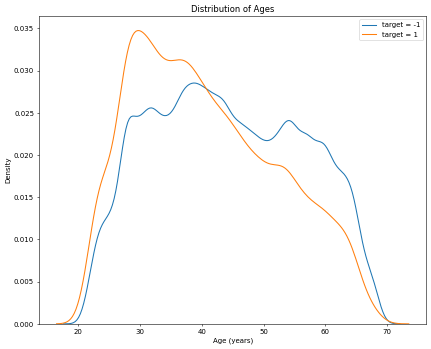

In [19]:
plt.figure(figsize = (10, 8),dpi=50)

# График KDE по кредитам, которые были погашены вовремя
sns.kdeplot(data.loc[data['target'] == -1, 'days_birth'] / -365, label = 'target = -1')

# KDE график кредитов, которые не были погашены вовремя
sns.kdeplot(data.loc[data['target'] == 1, 'days_birth'] / -365, label = 'target = 1')

# Маркируем
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

# описание линий
plt.legend();

Видим что большинство кредитов погашают в возрасте до 40 лет.

In [21]:
# видим что признаки 'days_birth','days_employed','days_id_publish','days_registration','days_last_phone_change'
# исчисляются в днях, встечаются как отрицательные так и положительные значения.
# исправляем

import numpy as np

# Список колонок, которые нужно преобразовать
columns_to_convert = ['days_birth', 'days_employed', 'days_id_publish','days_registration', 'days_last_phone_change']

# Применяем преобразование и берем абсолютное значение
data[columns_to_convert] = (np.abs(data[columns_to_convert]) // 365)

# В результате, значения в этих колонках будут представлять собой годы, как положительные числа, а NaN значения останутся как есть
data = data.rename(columns={'days_birth': 'years_birth', 
                            'days_employed': 'years_employed', 
                            'days_id_publish': 'years_id_publish', 
                            'days_registration': 'years_registration', 
                            'days_last_phone_change': 'years_last_phone_change'})

In [22]:
# есть аномалии в years_employed
data[['years_birth','years_employed',
      'years_id_publish','years_registration',
      'years_last_phone_change']].describe()

,years_birth,years_employed,years_id_publish,years_registration,years_last_phone_change
count,307450.000000,307450.000000,307450.000000,307450.000000,307449.000000
mean,43.436425,184.985806,7.713472,13.168974,2.225218
std,11.954660,381.942590,4.134578,9.647051,2.193672
min,20.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,4.000000,5.000000,0.000000
50%,43.000000,6.000000,8.000000,12.000000,2.000000
75%,53.000000,15.000000,11.000000,20.000000,4.000000
max,69.000000,1000.000000,19.000000,67.000000,11.000000


In [24]:
# большое количество ошибок в возрасте
data[data['years_employed'] == 1000]['years_employed'].count()

55352

In [25]:
# Фильтруем данные, исключая тех, у кого 1000 лет
data_filtered = data[data['years_employed'] != 1000]

# Вычисляем среднее значение для оставшихся данных
mean_years_employed = data_filtered['years_employed'].mean()

# Заменяем значения в исходном датафрейме, макс стало 49 лет, а среднее 6
data['years_employed'] = data['years_employed'].replace(1000, mean_years_employed)


In [28]:
data['years_id_publish'].value_counts().sort_values().nsmallest(2)

years_id_publish
19     1
17    38
Name: count, dtype: int64

In [29]:
# убираем выбросы
data = data[(data['years_id_publish'] != 19) & (data['years_id_publish'] != 17)]

In [30]:
# количество таких людей не превышает 5 человек за 1 уникальное значение
data['years_registration'].value_counts().sort_values().nsmallest(11).index

Index([64.0, 60.0, 67.0, 65.0, 54.0, 55.0, 59.0, 61.0, 58.0, 62.0, 57.0], dtype='float64', name='years_registration')

In [31]:
indices_to_remove = np.array(data['years_registration'].value_counts().sort_values().nsmallest(11).index)

# Фильтруем данные, исключая строки с значениями из массива values_to_remove
data = data[~data['years_registration'].isin(indices_to_remove)]

In [32]:
# уменьшаем размерность из за ненадбности
int64_columns = data.select_dtypes(include=['int64']).columns

# Преобразуйте их в int32
data[int64_columns] = data[int64_columns].astype('int32')


In [33]:
# можем ли мы поменять на float32? смотрим на min и max
data.select_dtypes(include=['float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
amt_credit,307389.0,598988.365893,402470.648874,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
amt_goods_price,307113.0,538349.527689,369407.660603,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
region_population_relative,307389.0,0.020867,0.013830,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
years_employed,307389.0,6.036416,5.809359,0.000000e+00,2.000000,6.000000,7.000000,4.900000e+01
years_registration,307389.0,13.165604,9.639580,0.000000e+00,5.000000,12.000000,20.000000,5.600000e+01
ext_source_1,134074.0,0.502110,0.211056,1.456813e-02,0.333978,0.505964,0.675044,9.626928e-01
ext_source_2,306729.0,0.514395,0.191054,8.173617e-08,0.392457,0.565951,0.663617,8.549997e-01
ext_source_3,246464.0,0.510854,0.194843,5.272652e-04,0.370650,0.535276,0.669057,8.960095e-01
apartments_avg,151389.0,0.117443,0.108244,0.000000e+00,0.057700,0.087600,0.148500,1.000000e+00
basementarea_avg,127511.0,0.088448,0.082445,0.000000e+00,0.044200,0.076300,0.112200,1.000000e+00


In [34]:
# по колонкам min и max видим что такая точность нам не нужна
float64_columns = data.select_dtypes(include=['float64']).columns

# Преобразуйте их в float32
data[float64_columns] = data[float64_columns].astype('float32')

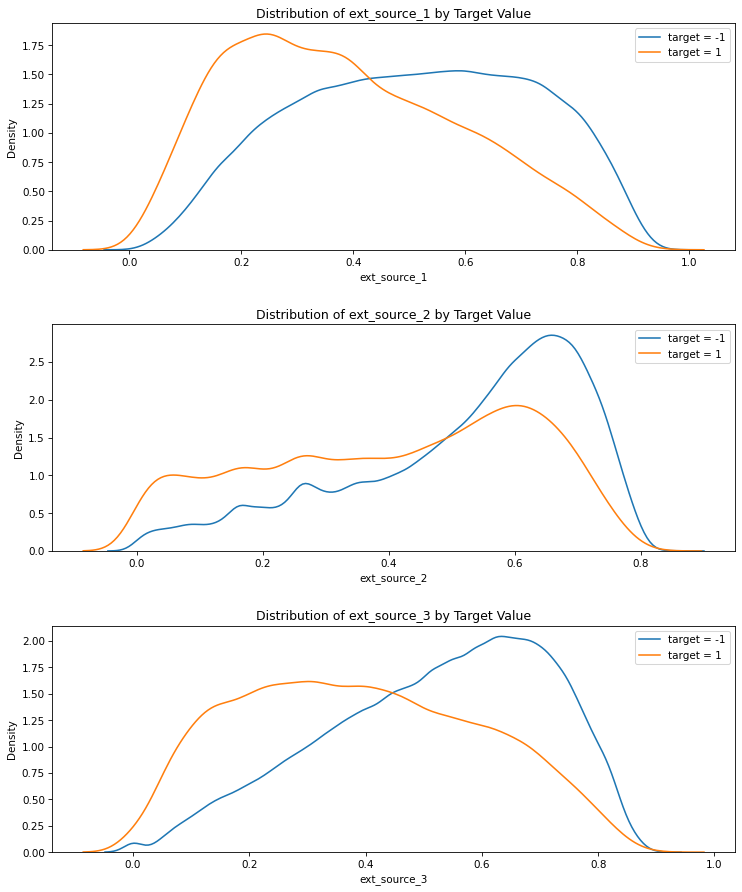

In [35]:
# смотрим на корреляцию топ 3 признаков
plt.figure(figsize = (10, 12),dpi=75)

# перебираем исходники
for i, source in enumerate(['ext_source_1', 'ext_source_2', 'ext_source_3']):
    
    # создаем новый подзаголовок для каждого источника
    plt.subplot(3, 1, i + 1)
    # кредиты, которые не были погашены
    sns.kdeplot(data.loc[data['target'] == -1, source], label = 'target = -1')
    # участок погашенных кредитов
    sns.kdeplot(data.loc[data['target'] == 1, source], label = 'target = 1')
    
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density')
    plt.legend();
    
plt.tight_layout(h_pad = 2.5)


EXT_SOURCE_3 отображает наибольшую разницу между значениями целевого значения. Мы ясно видим, что эта функция имеет некоторое отношение к вероятности погашения заявителем кредита. Взаимосвязь не очень сильная (на самом деле все они считаются очень слабыми), но эти переменные все равно будут полезны для модели машинного обучения, чтобы предсказать, погасит ли заявитель кредит вовремя.

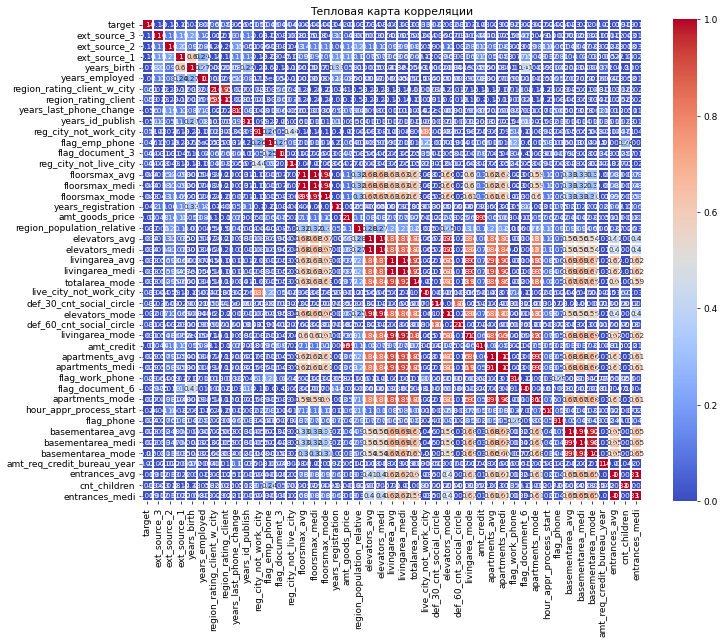

In [36]:
# Создаем тепловую карту корреляции
plt.figure(figsize=(12, 10), dpi=65)

# топ 50 коррелирующих признаков
df_heat = data.drop(categorical_columns, axis=1).corr()['target'].abs().sort_values().nlargest(50)

heatmap = sns.heatmap(data=data[df_heat.index].corr(), 
                     annot=True, 
                     cmap="coolwarm",
                     vmin=0,
                     vmax=1, 
                     linewidths=0.5,
                     annot_kws={"size": 8})

plt.title("Тепловая карта корреляции")
plt.yticks(rotation=0)  # Поворачиваем названия признаков на 90 градусов
plt.tight_layout()  # Автоматическое размещение названий признаков
plt.show()


In [37]:
# видим признаки которые идеентичные друг другу более 95% корреляции между собой. 
# оставляем одно значение, удаляем похожие(почти все связаны с медианами и модами)
data = data.drop(['floorsmax_medi','floorsmax_mode','region_rating_client',
                  'elevators_medi','livingarea_avg','elevators_mode',
                  'livingarea_mode','amt_credit','apartments_medi',
                  'totalarea_mode','apartments_mode','apartments_avg',
                  'basementarea_medi','entrances_medi','basementarea_mode','livingarea_medi'],axis=1)

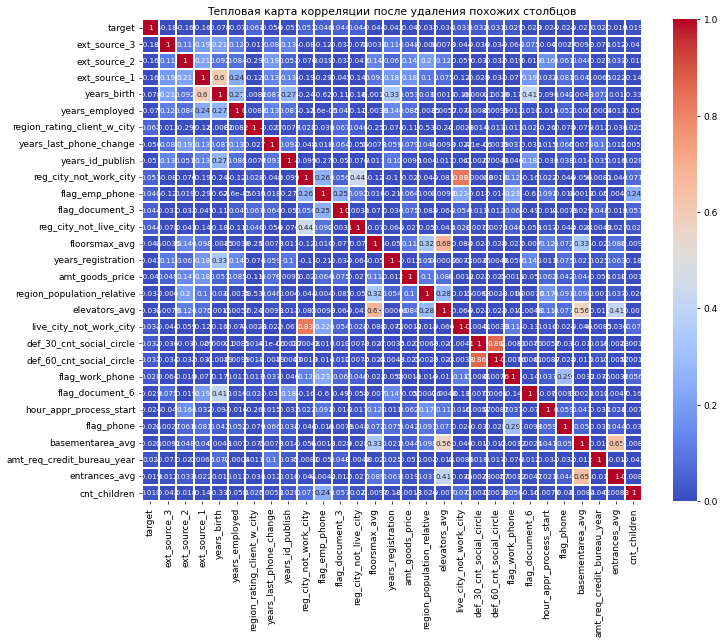

In [41]:
plt.figure(figsize=(12, 10), dpi=65)
df_heat = data.drop(categorical_columns, axis=1).corr()['target'].abs().sort_values().nlargest(50)
heatmap = sns.heatmap(data=data[df_heat.index].corr(), 
                     annot=True, 
                     cmap="coolwarm",
                     vmin=0,
                     vmax=1, 
                     linewidths=0.5,
                     annot_kws={"size": 8})

plt.title("Тепловая карта корреляции после удаления похожих столбцов")
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()


In [43]:
# удалось сократить обьем данных более чем в 4 раза, без существенной потери качества
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307389 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   target                       307389 non-null  int32  
 1   name_contract_type           307389 non-null  object 
 2   code_gender                  307389 non-null  object 
 3   flag_own_car                 307389 non-null  object 
 4   flag_own_realty              307389 non-null  object 
 5   cnt_children                 307389 non-null  int32  
 6   amt_goods_price              307113 non-null  float32
 7   name_type_suite              306100 non-null  object 
 8   name_income_type             307389 non-null  object 
 9   name_education_type          307389 non-null  object 
 10  name_family_status           307389 non-null  object 
 11  name_housing_type            307389 non-null  object 
 12  region_population_relative   307389 non-null  float32
 13  year


## 3. Обработка данных, обучение простой линейной модели  (5 баллов)

Изучите признаки, которые имеются в датасете.  
Какие из них относятся к каким типам?
Как они коррелируют с целевой переменной?
Обучите на ваших данных простую [Логистическую регресиию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)   
Какое качество вам удалось получить?


In [ ]:
# TODO
# Проведите обработку признаков
# Обучение простую логистическую регресиию

In [44]:
# так как у нас большой дисбаланс в классах целевой переменной. 
# я буду обучать данные на целевой переменной, где соотноешние классов будет ровняться примерно 1 к 1

# Разделим данные на два DataFrame: один для каждого класса
class_1_data = data[data['target'] == 1]
class_minus_1_data = data[data['target'] == -1]


# Выбираем 24813 строк что соответсвуют количеству класса '1'
class_1_sample = class_1_data.sample(len(class_1_data))

# Выберем случайные строки из класса '-1', чтобы получить равное количество
class_minus_1_sample = class_minus_1_data.sample(len(class_1_data), random_state=42)

# Объединяем выборки в один новый DataFrame
balanced_data = pd.concat([class_1_sample, class_minus_1_sample])

### Теперь у нас есть датафрейм balanced_data с равным количеством строк для обоих классов.

In [51]:
# определеяем целевую переменную и признаки
X = balanced_data.drop('target',axis = 1)
y = balanced_data['target']

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Создаем отдельный набор данных только с категориальными переменными
X_categorical = X[categorical_columns]

# Создаем и настраиваем SimpleImputer для категориальных переменных
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_categorical)


X_categorical = imputer.transform(X_categorical)

# Заменяем часть исходного датафрейма только на обработанные категориальные переменные
X[categorical_columns] = X_categorical

In [53]:
# Кодирование категориальных переменных
for col in categorical_columns:
    if X[col].nunique() <= 2:
        # Если уникальных значений 2 или меньше, используем OneHotEncoder
        one_hot_encoder = OneHotEncoder(sparse_output=False)
        encoded_values = one_hot_encoder.fit_transform(X[[col]])
        encoded_columns = [f"{col}_{i}" for i in range(encoded_values.shape[1])]
        X[encoded_columns] = encoded_values
        X.drop([col], axis=1, inplace=True)  # Удаляем исходный столбец
    else:
        # Если уникальных значений больше 2, используем pd.get_dummies
        X = pd.get_dummies(X, columns=[col], drop_first=True)


In [54]:
# Выводим размерность данных для сравнения
print('Data shape: ', X.shape, y.shape)

Data shape:  (49626, 85) (49626,)


In [55]:

# Заполненяем пропущенных значений на моду
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X)
X = imputer.transform(X)

# Масштабируем признаки
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [56]:
# Вывод результатов
print("1. Есть пропущенные значения:", np.isnan(X).any())
print("2. Среднее значение:", np.mean(X))
print("3. Медиана:", np.median(X))
print("4. Минимальное значение:", np.min(X))
print("5. Максимальное значение:", np.max(X))
print("6. Стандартное отклонение:", np.std(X))
print("7. Дисперсия:", np.var(X))

1. Есть пропущенные значения: False
2. Среднее значение: 0.2237459217056758
3. Медиана: 0.0
4. Минимальное значение: 0.0
5. Максимальное значение: 1.0
6. Стандартное отклонение: 0.38206639780433477
7. Дисперсия: 0.1459747323311802


In [57]:
# TODO
# Разбиваем выборку на трейн-тест-валидацию в пропорциях 0.5-0.2-0.3 соответственно
from sklearn.model_selection import train_test_split
x_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.5, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_, y_, test_size=0.4, random_state=42)

In [58]:
# проверяем правильность разбиения
for i in [x_train,x_test,x_valid]:
    print(round(len(i) / len(balanced_data), 1))
y_test.value_counts()

0.5
0.2
0.3


target
 1    5011
-1    4915
Name: count, dtype: int64

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Создаем модель логистической регрессии
model = LogisticRegression(solver='saga', multi_class='ovr', C=0.1, random_state=42, max_iter=2000)

In [60]:
# Обучаем модель на сбалансированных данных
model.fit(x_train, y_train)

# Предсказываем результаты на тестовой выборке
y_pred = model.predict(x_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Вывод отчета о классификации
print(classification_report(y_test, y_pred))

# Вывод точности
print("Accuracy:", accuracy_score(y_test, y_pred))

# Вывод матрицы ошибок
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.66      0.67      0.67      4915
           1       0.67      0.66      0.67      5011

    accuracy                           0.67      9926
   macro avg       0.67      0.67      0.67      9926
weighted avg       0.67      0.67      0.67      9926

Accuracy: 0.6663308482772516
[[3313 1602]
 [1710 3301]]



## 4. Оценка поведения модели в зависимости от гиперпараметров  (5 баллов)

Попробуйте поперебирать значения гиперпараметров `l2_coef, batch_size`.   
Какая их комбинация выглядит оптимальной?




In [ ]:
# TODO
# Оцените качество модели в зависимости от l2_coef и batch_size

In [62]:
def evaluate_model(X_train, y_train, X_valid, y_valid, l2_coef):
    
    # Создаем и обучаем модель с заданными гиперпараметрами
    evaluate_model = LogisticRegression(solver='saga', multi_class='ovr',C=l2_coef,penalty='elasticnet', l1_ratio=0, random_state=42, max_iter=2000)
    evaluate_model.fit(X_train, y_train)

    # Предсказываем результаты на валидационной выборке
    y_pred = evaluate_model.predict(X_valid)

    # Выводим отчет о классификации
    print("Classification Report:")
    print(classification_report(y_valid, y_pred))
    
    # Вывод точности
    print("Accuracy:", accuracy_score(y_valid, y_pred))
    
    # Вывод матрицы ошибок
    print(confusion_matrix(y_valid, y_pred))

In [63]:
c_values = np.logspace(0,3,5)
c_values

array([   1.        ,    5.62341325,   31.6227766 ,  177.827941  ,
       1000.        ])

In [64]:
l2_coef = c_values[1]
evaluate_model(x_train, y_train, x_valid, y_valid, l2_coef)

Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.67      0.67      7540
           1       0.66      0.67      0.66      7347

    accuracy                           0.67     14887
   macro avg       0.67      0.67      0.67     14887
weighted avg       0.67      0.67      0.67     14887

Accuracy: 0.6663531940619333
[[5031 2509]
 [2458 4889]]


In [65]:
l2_coef = c_values[4]
evaluate_model(x_train, y_train, x_valid, y_valid, l2_coef)

Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.67      0.67      7540
           1       0.66      0.67      0.66      7347

    accuracy                           0.67     14887
   macro avg       0.67      0.67      0.67     14887
weighted avg       0.67      0.67      0.67     14887

Accuracy: 0.6667562302680191
[[5033 2507]
 [2454 4893]]


In [71]:
c_values_1 = np.logspace(0,-3,5)
c_values_1

array([1.        , 0.17782794, 0.03162278, 0.00562341, 0.001     ])

In [67]:
l2_coef = c_values_1[3]
evaluate_model(x_train, y_train, x_valid, y_valid, l2_coef)

Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.67      0.67      7540
           1       0.66      0.67      0.66      7347

    accuracy                           0.67     14887
   macro avg       0.67      0.67      0.67     14887
weighted avg       0.67      0.67      0.67     14887

Accuracy: 0.6666890575670048
[[5020 2520]
 [2442 4905]]


In [68]:
l2_coef = c_values_1[4]
evaluate_model(x_train, y_train, x_valid, y_valid, l2_coef)

Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.64      0.65      7540
           1       0.65      0.66      0.66      7347

    accuracy                           0.65     14887
   macro avg       0.65      0.65      0.65     14887
weighted avg       0.65      0.65      0.65     14887

Accuracy: 0.6545979713844293
[[4860 2680]
 [2462 4885]]


Оптимальный коэффициент для 
- C: 1 - 5 чем дальше от этих значений чем хуже
- от lasso-ridge регрессии явных изменений не заметил
- от выбора модели solver, не заметил изменений


## 5. GridSearchCV. Отбор признаков  (5 баллов)


С помощью GridSearchCV подберите оптимальные параметры `step_alpha, step_beta` для фиксированных значений `l2_coef, batch_size` с предыдущего шага.  
Проведите отбор признаков любым из известных вам методов

In [ ]:
# TODO
# Подберите гиперпараметры step_alpha, step_beta для фиксированных l2_coef, batch_size
# Проведите отбор признаков

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

c = np.logspace(0.1,2,5)[:-2]
l1_ratio = np.linspace(0,1,5)
# Создаем объект модели
model = LogisticRegression(solver='saga', multi_class='ovr', random_state=42, max_iter=2000)

# Задаем параметры для L2 регуляризации
param_grid_l2 = {
    'C': c,
    'penalty': ['l2']
}

# Создаем объект GridSearchCV для L2
grid_search_l2 = GridSearchCV(model, param_grid_l2, scoring='accuracy', cv=5)
grid_search_l2.fit(x_train, y_train)

# Выводим лучшие параметры и результаты для L2
print("Лучшие параметры для l2:", grid_search_l2.best_params_)
print("Лучшая точность для l2:", grid_search_l2.best_score_)

# Теперь задаем параметры для ElasticNet
param_grid_elasticnet = {
    'C': c,
    'penalty': ['elasticnet'],
    'l1_ratio': l1_ratio
}

# Создаем объект GridSearchCV для ElasticNet
grid_search_elasticnet = GridSearchCV(model, param_grid_elasticnet, scoring='accuracy', cv=3)
grid_search_elasticnet.fit(x_train, y_train)

# Выводим лучшие параметры и результаты для ElasticNet
print("Лучшие параметры для ElasticNet:", grid_search_elasticnet.best_params_)
print("Лучшая точность для ElasticNet:", grid_search_elasticnet.best_score_)



Лучшие параметры для l2: {'C': 3.758374042884441, 'penalty': 'l2'}
Лучшая точность для l2: 0.6637242803517492
Лучшие параметры для ElasticNet: {'C': 1.2589254117941673, 'l1_ratio': 0.75, 'penalty': 'elasticnet'}
Лучшая точность для ElasticNet: 0.6618707935356466


In [76]:
y_pred = grid_search_l2.best_estimator_.predict(x_valid)
# Выводим отчет о классификации
print("Classification Report:")
print(classification_report(y_valid, y_pred))
    
    # Вывод точности
print("Accuracy:", accuracy_score(y_valid, y_pred))
    
    # Вывод матрицы ошибок
print(confusion_matrix(y_valid, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.67      0.67      7540
           1       0.66      0.67      0.66      7347

    accuracy                           0.67     14887
   macro avg       0.67      0.67      0.67     14887
weighted avg       0.67      0.67      0.67     14887

Accuracy: 0.6663531940619333
[[5033 2507]
 [2460 4887]]



## 6. Оценка качества модели  (5 баллов)


Оцените качество модели с помощью известных вам метрик классификации.  
Что ещё в модели можно было бы улучшить?


In [ ]:
# TODO
# Оцените качество модели с помощью известных вам метрик

Заметное улучшение используя гипперпараметры я не увидел:
- лучшая модель получилась c помощью gridsearchcv, показав 66.6% точности
- Удаляясь от диапазона С (1-5) мы ухудшаем результат
- разделение cv на 3 или 5 отрезков не дает явных изменений
- применив модель градиентного бустинга с деревьями решений можно добиться лучшего результа чем в лог. регрессии 68.8%

Данные оказались не лучшего качества:
- имеются NaN значения в том числе на лучших признаках.
- большинство признаков имеют средние значения _avg,_mean,_mode
    - имеют низкую корреляцию с целевой переменной.
- данные имеют аномалии, не правильные значения.
- большой обьем, данные не оптимизированы.
- имеется большой дисбаланс соотношение которое примерно 1 к 11 в классах целевой переменной

In [103]:
import lightgbm as lgb

# на последок попробуем другую модель
model = lgb.LGBMClassifier(
    subsample = 0.8,
    objective='binary',
    boosting_type='gbdt',
    metric='binary_logloss',
    num_leaves=51,
    learning_rate=0.001,
    n_estimators=10000,
    reg_lambda=3.758374042884441,
    max_depth=-1,
    random_state=42
)

In [104]:
model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 12455, number of negative: 12358
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1968
[LightGBM] [Info] Number of data points in the train set: 24813, number of used features: 84
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501955 -> initscore=0.007819
[LightGBM] [Info] Start training from score 0.007819


LGBMClassifier(learning_rate=0.001, metric='binary_logloss', n_estimators=10000,
               num_leaves=51, objective='binary', random_state=42,
               reg_lambda=3.758374042884441, subsample=0.8)

In [105]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6883941164618175
Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.70      0.69      4915
           1       0.70      0.68      0.69      5011

    accuracy                           0.69      9926
   macro avg       0.69      0.69      0.69      9926
weighted avg       0.69      0.69      0.69      9926

Confusion Matrix:
[[3419 1496]
 [1597 3414]]
